<a href="https://colab.research.google.com/github/juanagustinmasi/VacunarTech/blob/main/TP3/Cuaderno_1_martes_grupo6_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instalación de CUDA**

In [ ]:
pip install pycuda

     |████████████████████████████████| 1.7MB 4.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=626965 sha256=e9ddc362cbd5ca3002455a7aaa165fb49b5147ffb144eb5738581f90da05868d
  Stored in directory: /root/.cache/pip/wheels/d5/55/64/fd4dddcc5f1c25eebd90b5291c3769101dc978c70165685512
Successfully built pycuda
  Created wheel for pytools: filename=pytools-2021.2.7-py2.py3-none-any.whl size=60644 sha256=d7778b9abee4933aae4482a512cc650ee39ed5abe5c7706598c5ffa810fbe9c3
  Stored in directory: /root/.cache/pip/wheels/a0/b5/e5/e65d25997fd77729b9aa214645add18688483e48bbcbab6ffc
Successfully built pytools


# **Instalación de PyOpenCl**

In [5]:
pip install pyopencl

     |████████████████████████████████| 880kB 4.4MB/s 


# **Montado de GDrive a la VM de Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Actualizado de ruta de archivos

In [ ]:
# Obtener directorio actual #
os.path.abspath(os.getcwd())
# Cambiar directorio actual #
os.chdir('./drive/MyDrive/Colab Notebooks')


# **Procesamiento y filtrado de imágen utilizando CPU** 
Se utilizó la API OpenCV-Python, destinado a hacer que el procesamiento regular de imágenes sea rápido y portátil. Estos dos objetivos se logran mediante la introducción de un nuevo modelo de ejecución basado en gráficos

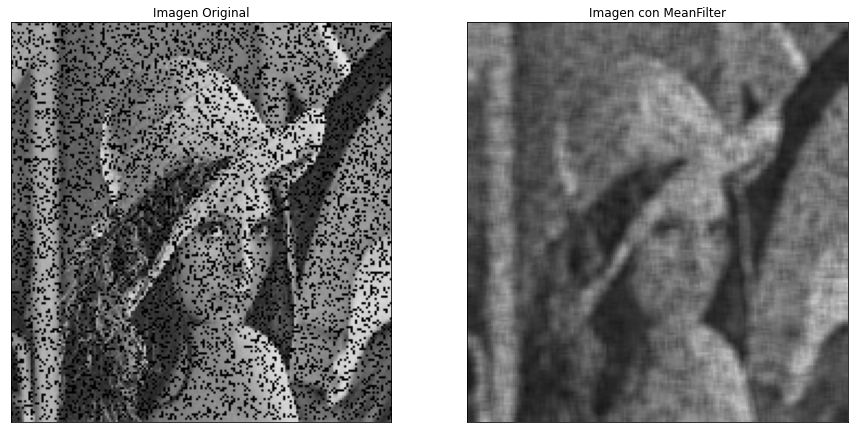

In [16]:
import os
os.environ['OPENCV_IO_MAX_IMAGE_PIXELS']=str(2**64)
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread(r'./saltandpepperlena.png')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)


#Mostrar imagen
plt.figure(figsize = (15, 10))
plt.subplot(121),plt.imshow(img),plt.title('Imagen Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Imagen con MeanFilter'),plt.xticks([]), plt.yticks([])
plt.show()



# **Mean Filter utilizando CUDA**
Ahora realizamos el mismo procedimiento de filtrado de la media pero basado en la computación paralela de la GPU. El resultado final del experimento muestra que el método propuesto funciona de manera más eficiente en comparación con el método tradicional de la CPU

In [17]:
import os
os.environ['OPENCV_IO_MAX_IMAGE_PIXELS']=str(2**64)
import cv2
import numpy as np


img =  cv2.imread(r'./saltandpepperlena.png')
imgMat = cv2.cuda_GpuMat(img)
imgSat = cv2.cuda.cvtColor(imgMat,cv2.COLOR_BGR2HSV)
#print("Before Merge type : ",type(imgSat))
h,s,v = cv2.cuda.split(imgSat)
size_s = s.size()
w_s = cv2.cuda_GpuMat(size_s[1],size_s[0], s.type(), [30])
cuImgMerge = cv2.cuda_GpuMat(imgSat.size(),imgSat.type())
cv2.cuda.merge([h,s,v],cuImgMerge )

blur = cv2.cuda.bilateralFilter(cuImgMerge,90,30,30)
sharp = cv2.cuda.addWeighted(cuImgMerge, 0.3, blur,.5, 100)
sharpened = sharp.download()
cv2.imshow('Frame 1',img)
cv2.imshow('Frame 2',sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()

SystemError: ignored

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [3]:
pip install torchvision --upgrade

Requirement already up-to-date: torchvision in /usr/local/lib/python3.7/dist-packages (0.10.0+cu102)


In [10]:
from PIL import Image
from torchvision import transforms
from torchvision.datasets import CIFAR10
import random
import torch as tf
import numpy as np
import cv2

#defino al GPU como un objeto
device0 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#cargo la imagen
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/saltandpepperlena.png')
#transformo la imagen en un array de pixeles
pil_img = Image.fromarray(img).convert('RGB')
#transformo el array de pixeles en un tensor
arr = img 
new_arr = np.expand_dims(arr, 0)
tensor = tf.convert_to_tensor(new_arr,dtype=transforms.float32)

#creo la matriz con un array
kernel = np.ones((5,5),np.float32)/25

#transformo el array2 en un tensor

tensor2 = tf.convert_to_tensor(kernel,dtype=transforms.float32)
#muevoo los 2 tensores a GPU

#Multiplico a los tensors en GPU

#muestro resultados

  

AttributeError: ignored